# COMP30760 Assignment 2 - Task 2
In this Assignment we will collect stock price data from HTML pages and construct time series from the data. The four companies we will be analysing is:

Apple Inc. (AAPL)

Alphabet Inc. (GOOG)

Ebay (EBAY)

Pfizer (PFE)

For this analysis I intend all prices to be in US Dollars ($)

As I mention below I am mainly focusing on the closing price for much of the visual analysis as I believe that this is the most common data used when graphing the data (I believe it is actually adjusted close however we do not have access to this for this particular project).


This notebook covers Task2-Time Series Analysis. We will use the saved csv files from task 1 as the basis of our analysis.

In [1]:
import urllib.request
import pandas as pd
import bs4
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from statistics import stdev
import seaborn as sns
from scipy.stats import norm
from sklearn.metrics.pairwise import euclidean_distances

Below is a list of useful key settings and appearence for displaying our data later:

In [2]:
#base link of html page
base_link="http://mlg.ucd.ie/modules/COMP30760/stocks/data-"
#html link for each stock
stock_link={"AAPL":"aapl.html","GOOG":"goog.html","EBAY":"ebay.html","PFE":"pfe.html"}
#ticker associated with each stock
stock_ticker={"Apple":"AAPL","Google":"GOOG","Ebay":"EBAY","Pfizer":"PFE"}
#create names for column
column_names=["Open","High","Low","Close"]
#Set a default font size
font_size=13
#disctionay to represent a color for each stock, this will be helpful for graphing
stock_color={"Apple":"skyblue","Google":"tomato","Ebay":"springgreen","Pfizer":"orange"}
#Stock names as a list
stock_name=["Apple","Google","Ebay","Pfizer"]

Directory of clean csv file

In [3]:
dir_path = Path("raw_data_assignment_2")

# Loading saved data
Lets create a function to load the csv files into a dictionary of dataframes

In [4]:
def load_data(stock):
    print("loading "+stock+" data...")
    file_path="%s/%s.csv"%(dir_path,stock)
    data=pd.read_csv(file_path,parse_dates=True,index_col='Date')
    print("successfully loaded "+stock+" data")
    return data
     

In [5]:
df_stocks={}
for stock in stock_ticker:
    df_stock=load_data(stock)
    df_stocks[stock]=df_stock

loading Apple data...
successfully loaded Apple data
loading Google data...
successfully loaded Google data
loading Ebay data...
successfully loaded Ebay data
loading Pfizer data...
successfully loaded Pfizer data


Lets see if our function worked....

In [6]:
df_stocks["Apple"].head()

,Stock,Open,High,Low,Close
Date,,,,,
2019-10-01,AAPL,56.267502,57.055000,56.049999,56.147499
2019-10-02,AAPL,55.764999,55.895000,54.482498,54.740002
2019-10-03,AAPL,54.607498,55.240002,53.782501,55.205002
2019-10-04,AAPL,56.410000,56.872501,55.972500,56.752499
2019-10-07,AAPL,56.567501,57.482498,56.459999,56.764999


Great! Now we can move on to our time series Analysis

In [7]:
df_stocks["Pfizer"].loc["2019-10-01"]

Stock          PFE
Open      33.45351
High     33.462997
Low      32.884251
Close    32.922199
Name: 2019-10-01 00:00:00, dtype: object

# Time Series Analysis
Before we begin to visualise our time series data lets create a quick function to generate some interesting stats about each stock.

**For the most part we will be using the closing price for most of our analysis..**

In [8]:
def get_stats(stock):
    rows=[]
    
    #use pandas pct_change to get the daily returns
    daily_returns=df_stocks[stock]["Close"].pct_change()
    #use pandas pct_change to get the daily returns, we also resample the date time index to sort by month. ffill() used to fill in any missing values as we are calculating monthly
    monthly_returns = df_stocks[stock]["Close"].resample('M').ffill().pct_change()
    #calculating cumilative returns using numpy cumprod() function
    apple_cumu_returns=round((daily_returns+1).cumprod()*1000,2)
    
    #creaing the dataframe, this will only have one row as we are only interested in the
    row={"Stock":stock}
    row["Average Clsoing Price $"]=round(df_stocks[stock]["Close"].mean(),2)
    row["Average Opening Price $"]=round(df_stocks[stock]["Open"].mean(),2)
    row["Highest Price $"]=round(df_stocks[stock]["High"].max(),2)
    row["Lowest Price $"]=round(df_stocks[stock]["Low"].min(),2)
    row["Average High/Low Range $"]=round(df_stocks[stock]["High"].mean()-df_stocks[stock]["Low"].mean(),2)
    row["Average Closing Standard Deviation $"]=round(stdev(df_stocks[stock]["Close"]),2)
    row["Average Daily Returns %"]=round(daily_returns.mean()*100,2)
    row["Average Monthly Returns %"]=round(monthly_returns.mean()*100,2)
    #returning last row in the apple_cumu_returns dataframe as this is the final value of our initial 1000$ investment
    row["Comulutave returns of 1000$"]=apple_cumu_returns["2021-09-30"]
    
    
    rows.append(row)
    
    return pd.DataFrame(rows).set_index("Stock")
    

## Apple Stock Analysis (AAPL)
Just in case you are unaware of Apple, it "is an American multinational technology company that specializes in consumer electronics, computer software and online services. Apple is the largest information technology company by revenue and, since January 2021, the world's most valuable company". It was founded in 1976 by Steve Jobs, Steve Wozniak and Ronald Wayne. Apple publicly trades on the NASDAQ stck exchange in the US. (Adapted from https://en.wikipedia.org/wiki/Apple_Inc.) 

Lets first of all use our get_stats function we created above to gain an incide to apples recent stock price performance.

In [9]:
get_stats("Apple")

,Average Clsoing Price $,Average Opening Price $,Highest Price $,Lowest Price $,Average High/Low Range $,Average Closing Standard Deviation $,Average Daily Returns %,Average Monthly Returns %,Comulutave returns of 1000$
Stock,,,,,,,,,
Apple,106.27,106.2,157.26,53.15,2.52,29.55,0.21,4.05,2520.15


This data is quite interesting. From an investors point of view we can see that APPL has experiened strong monthly and daily returns. This means that an investment in this company could possibly yeild both positive daily and monthly returns and we can see that an investment of 1000 dollars two years ago would yeild an impressive 2520.15 dollars. However, its interesting to note that APPL has quite a high standard deviation, this implies that the stock may be succeptable to a good deal of volatility as its single standard deviation range is nearly 60$. With increased volatility comes increased risk as the stock may be succeptable to large fluctuations in price. Thankfully however with Apple it appears that over the last two years it has had an upward trend due to the positive returns, lets see if this is correct by visualising its daily stock price on a graph.

### Apple Daily Stock Visualisation
In the below graph I have calculated the 50 day and 200 day moving average (rolling mean). The moving average is a tool used in finance to help smooth out the pricing data by creating a constantly updated average pricing of the last n days (in our case 50 days and 100). Although our data only covers the last 2 years these moving averages can give us a good incite to how the stock price is performing. As a reminder, if a stock price is above its moving average, it is said to be in an upward trend, and said to be in a downward trend if the stock price is below its moving average. Moving averages are particurlarly good for finding potential investment opportunities. Hopefully in the next graph we will see some scenarios where the moving average could be used to make an investment. Let' s create a function showing the daily stock price and moving averages.

In [10]:
def plot_daily(stock):
    #calculating 50 day moving average using the built in pandas .rolling() function and finding the mean
    df_stocks[stock]['Close MA50']=df_stocks[stock]['Close'].rolling(50).mean()
    #doing the same for the 200 day moving average, as you can see on the graph the line will only start showing after 50 or 200
    df_stocks[stock]['Close MA200']=df_stocks[stock]['Close'].rolling(200).mean()
    #creating line plot using the close column and the two newly created moving average columns 
    df_stocks[stock][['Close','Close MA50','Close MA200']].plot(label=stock,figsize=(16,8),title=stock+" Daily Closing Price")
    plt.ylabel("Stock Price ($)");

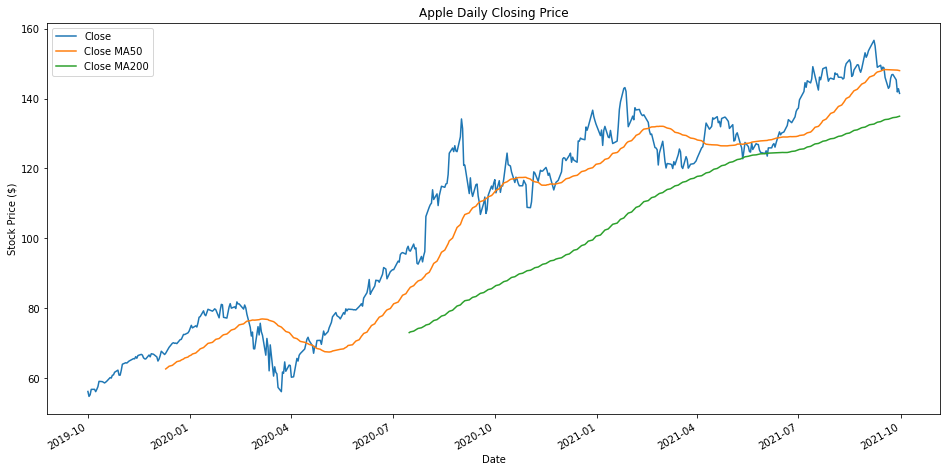

In [11]:
plot_daily("Apple")

From the graph we can see that our get_stats() function was right as we can see a general upward trend from its starting price below 60 dollars to well over 130 dollars in october of this year. Our moving average lines can help us see this uptrend clearly. However our get_stats() function also highlighted potential volatility which we can clearly see as the stock experiences many violent fluctuations. The two most notable dips in its price can be seen in the periods of the first quarter of 2020 and september of 2020. We can see from our 200 moving day average that apple has experienced tremendous growth over that last 2 years.

**Performance Analysis:** We can see that apple stock suffered a downturn (drop of 20% or more) durin around february/march time of 2020 which as we all know was due to the severity of the covid-19 pandemic. We can see that when the stock passes the yelow 50 day moving average line we can see a continued downward trend, highlighting a possible short position (predict the stock goes down). However, like most large-cap tech companies apple bounced back exceptionally seeing promising gains. We can see that when the stock passes above to 50 day moving average after experiencing a down trend, this could be a possible time to open a long position (predict the stock to go up) which would have seen favourable returns with the stock nearly doubling in value over the next six months until september of 2020. From some research I believe the the reason for the stocks fall in september of 2020 was due to many large investors moving their money out of the high cap companies in the tech sector amid speculation of them being over valued. This could be due to Apples rapid gains over that six month period where it experienced many all time highs. However Apple again rebounded back to an all time high. We can see however from our 50 day moving average line that apple has experienced a great deal of volatility since september of 2020 with the stock price falling and rising below and above this line on many occasions.

### Apple Monthly Stock Visualisation
Lets now smooth out our daily prices by looking at APPL at monthly frequencies. We will create a function show_monthly() to show this graph as we will need to se this again for our three other stocks.

In [12]:
def show_monthly(stock):
    #creating monthly price dataframe 
    monthly_price=df_stocks[stock]["Close"].groupby(pd.Grouper(freq='M')).mean()
    df_stocks[stock]["Close MA50"].plot()
    monthly_price.plot(label=stock,figsize=(16,8),title="Monthly Average "+stock+" Closing Price (Monthly Frequency)")
    plt.xlim("2019-11-01","2021-09-30")
    plt.ylabel("Stock Price ($)")
    plt.legend();

Lets now plot Apple's average monthly returns

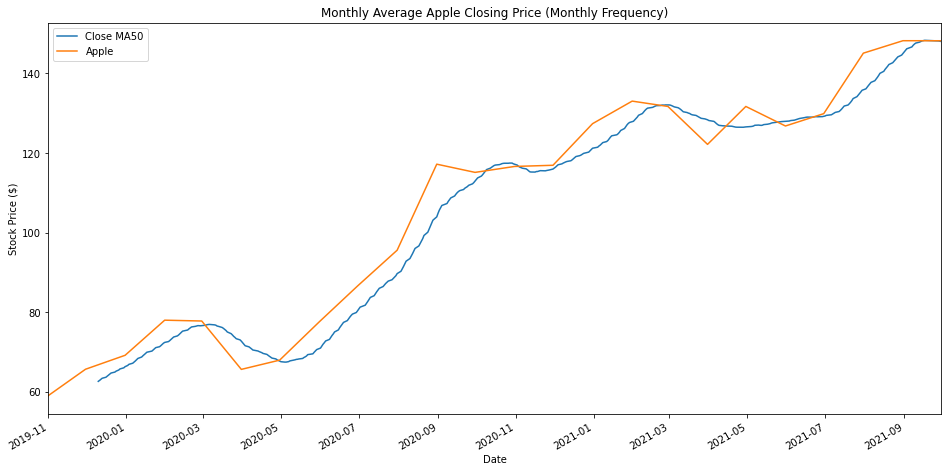

In [13]:
show_monthly("Apple")

From this monthly frequency graph we can see that much of our daily fluctuations are smoothed out which gives us a clear view of its price performance. Its interesting to note that the dip in september of 2020 is alot harder to see. This could be due to the dip only lasting a few weeks in september before rebounding, resulting in only a slightly lower price when compared to august of 2020. The dip in the first quarter of 2020 due to the covid 19 pandemic can clearly be seen, particurlarly we can see February of 2020 experiencing a slump. We can also see more recent dips again in february of 2021 which could have been due to investors unsure of Apples next big move or possible avenues to electric cars and VR (Virtual Reality) gear. We can also see its period of exceptional growth after the first dip due to the pandemic (March 2020-August 2020)

### Apple Quarterly Stock Visualisation
Lets now smooth out our monthly prices by looking at APPL at quarterly frequencies. We will create a function show_quarterly() to show this graph as we will need to se this again for our three other stocks.

In [14]:
def show_quarterly(stock):
    #creating quarterly price dataframe 
    monthly_price=df_stocks[stock]["Close"].groupby(pd.Grouper(freq='Q')).mean()
    df_stocks[stock]["Close MA200"].plot()
    monthly_price.plot(label=stock,figsize=(16,8),title="Quarterly Average "+stock+" Closing Price (Quarterly Frequency)")
    plt.ylabel("Stock Price ($)")
    plt.legend();

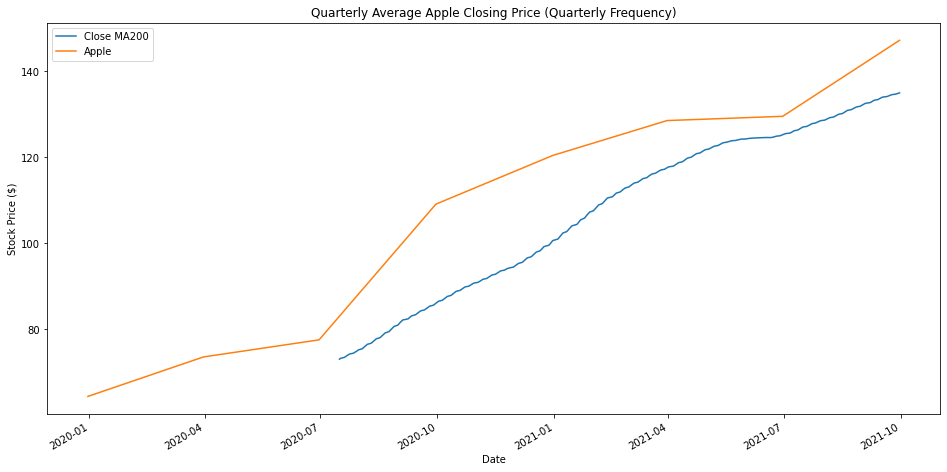

In [15]:
show_quarterly("Apple")

We can now interestingly see that there is no Quarter where the stock price fell below that of the last quarter. This is an excllent sign for investors who would be interested in a long term buy position. It's also very interesting to see that Apple came out of the initial covid-19 pandemic unscaved. This is largely due to the tech sector as a whole not being impacted as other sectors over that past 2 years. With much of apples sales coming from their online website and the fact that the also provide digital services such as Apple TV and iCloud, a hugh majority of their sales comes outside of face to face interaction.

### Apple Return Visualisation
Before we finish our Apple analysis lets have a look at the daily returns of Apple. We will again create a function to show this.

In [16]:
def show_returns_hist(stock):
    
    #calculate daily returns using pandas .pct_change() function 
    daily_returns=df_stocks[stock]["Close"].pct_change()
    std=round(daily_returns.std(),4)
    mean=round(daily_returns.mean(),4)
    
    fig = plt.figure()
    ax1 = fig.add_axes([0,0,1,1])
    daily_returns.plot.hist(bins = 60)
    ax1.set_xlabel("Daily returns %")
    ax1.set_ylabel("Amount")
    ax1.set_title(stock+" daily returns data")
    ax1.text(-0.065,20," Low\nreturns")
    ax1.text(0.065,20," High\nreturns")
    ax1.text(0.065,40,"Standard \ndeviation\n"+str(std))
    ax1.text(0.065,33,"Mean\n"+str(mean))
    plt.show()

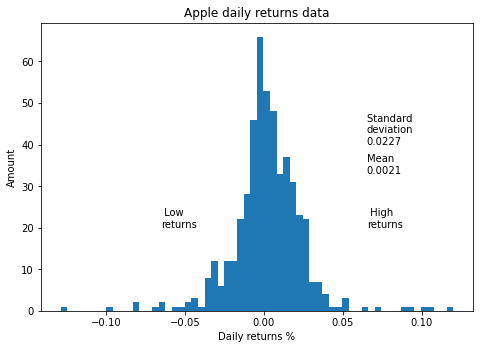

In [17]:
show_returns_hist("Apple")

We can see that the majority of our daily returns data lies 10% between 0%. I would conclude from out get_stats() function that the histogram tends slightly to the right side of 0% idicating an average positive returs however it's interesting to point out the range of the returns, with some days where there was a loss of over 10%, and also a gain of over 10%. This histogram does a great job of outlining Apples short term volatility. This would suggest to me that Apple may not be the best option for an average investor looking for a short term profit, due to these fluctuations.

In [18]:
def show_returns_line(stock):
    #calculate daily returns using pandas .pct_change() function 
    daily_returns=df_stocks[stock]["Close"].pct_change()
    #cumulative returns can be calculated using the numpy .cumprod() function
    daily_cumu_returns=round((daily_returns+1).cumprod()*1000,2)
    
    
    fig = plt.figure()
    ax1 = fig.add_axes([0.05,0.05,0.9,0.9])
    daily_cumu_returns.plot(figsize=(16,8),label="Daily Returns")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Growth of $1000 investment")
    ax1.set_title(stock+" Daily Returns")
    plt.show()
    

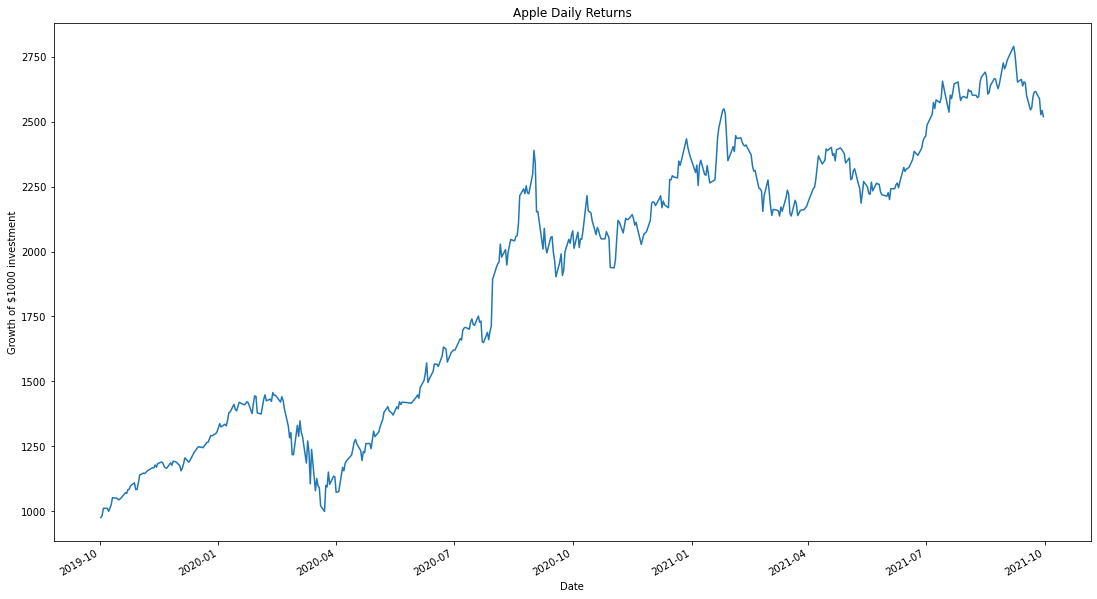

In [19]:
show_returns_line("Apple")

We can see from this from this graph that the daily returns follows that of the daily stock price data but we are more importantly focused on the y axis as we see our initial 1000 dollar investment yielding us a return of around 2500 dollars which is very promising.

## Google Stock Analysis (GOOG)
I'll once again give you a bit of backround information regarding our next company. "Google is an American multinational technology company that specializes in Internet-related services and products, which include online advertising technologies, a search engine, cloud computing, software, and hardware. It is considered one of the Big Five companies in the American information technology industry, along with Amazon, Apple, Meta (Facebook) and Microsoft". It was founded in 1998 and like Apple it trades on the NASDAQ stock exchange. In october of 2015, Google went through a restructuring which saw its official name change to Alphabet Inc. which saw it become a parent company of google and several former Google subsidiaries. It is among the largest Tech companies in the world. (Adapted from https://en.wikipedia.org/wiki/Google)

Lets first compute some basic information about Googles market performance over the last two years...

In [20]:
get_stats("Google")

,Average Clsoing Price $,Average Opening Price $,Highest Price $,Lowest Price $,Average High/Low Range $,Average Closing Standard Deviation $,Average Daily Returns %,Average Monthly Returns %,Comulutave returns of 1000$
Stock,,,,,,,,,
Google,1792.62,1790.08,2929.79,1013.54,35.51,517.21,0.18,3.64,2211.69


we can see from this interesting row of data that similar to Apple, yearly returns are well over %200 ROI which could indicate to us that large cap US tech companies have flourished in recent years. Its also important to note that the stock price of Google is considerably higher than Apples, however the standard deviation does still appear to be quile similar to apple when concentrated on percentages, with one standard deviation above and below being just shy of 60% of their relevants stock average closing price (calculated by: (Average Closing Standard Deviation *2)/Average closing price). This tells us that Google is very volatile in terms of daily price. Its also interesting to note that one may assume that Google has a larger market cap (higher valued) than Apple. However this is incorrect as Google just has considerably less shares available to buy than Apple, hence the dramatic difference in stock price. In conclusion, we can see very similar statistics between Apple and Google, most notably, both stocks are highly volatile and hence, carry alot of risk. Aside from this risk however based on the last 2 years of Google trading, on any given day, Google will end the trading day around .18% better off than when it opened that morning.  

### Google Daily Stock Visualisation
Lets again see what the above get_stats formula looks like on a graph...

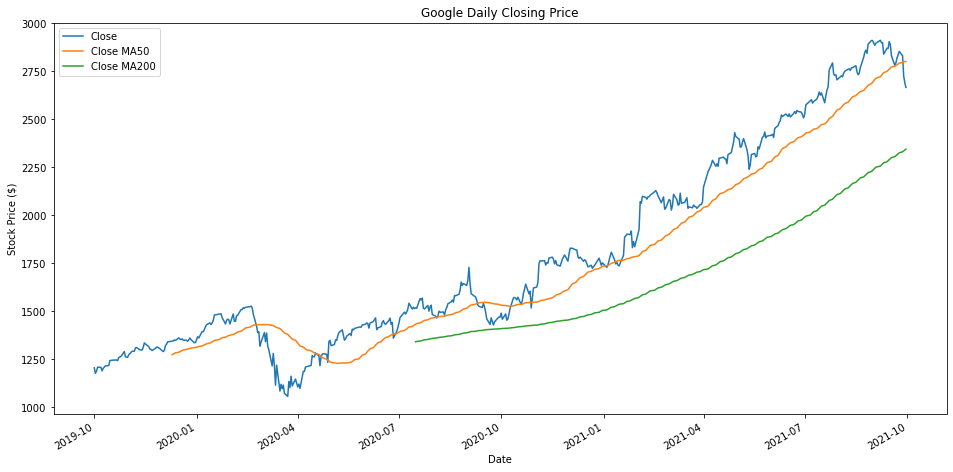

In [21]:
plot_daily("Google")

We can see from this above graph that over the course of the two years Google has seen a steady surge upwards. However we can also see countless fluctuations over the two year period, which daily graphs tend to show us, this is not a great sign for an investor who focuses on short term gain as the stock has a risk of swinging up and more importantly down, affecting short term gains. Contrastingly to Apple However we can only observe one prolongued period where the stock price falls below the 50 day moving average. This occured as we can see some time between february and april of 2020. It is worth noting from September of 2020 until around May of 2021 although the stock price has risen impressively we can see numerious periods of the stock price falling and at times bouncing around that 50 day moving average. More impressively in terms of a potential long term focused investor, since the 200 moving day average's inception on this graph the stock price does not fall below this line. Lets now see if we can find reasons for Googles performance over the last few years.

**Performance Analysis:** From researching what was happening the economy in the early part of 2020 we know that Googles correction in price was due to the covid-19 pandemic and the economic uncertainty that followed on from this. However as most of Googles revenue comes from advertisement on their online services such as Youtube and Google Search, they recovered quickly and we saw impressive gains as it continually broke it's all time highs. If anything, the covid-19 pandemic boosted Googles revenue and profit as much of the major economies population was unable to work and had to spend time at home, promoting online activity. The previous sentence in my opinion is the reason in my opinion for Googles steady rise in stock price since its correction in early 2020, with the numerous drops being associated with major investors being weary of the overvaluation of large cap tech companies and the prediction that revenue may drop as the world begins to come back to reality and people get back to work.

### Google Monthly Stock Visualisation
Lets now smooth out our daily prices by looking at GOOG at monthly frequencies. Lets use the show_monthy function we created earlier for the Apple stocK....

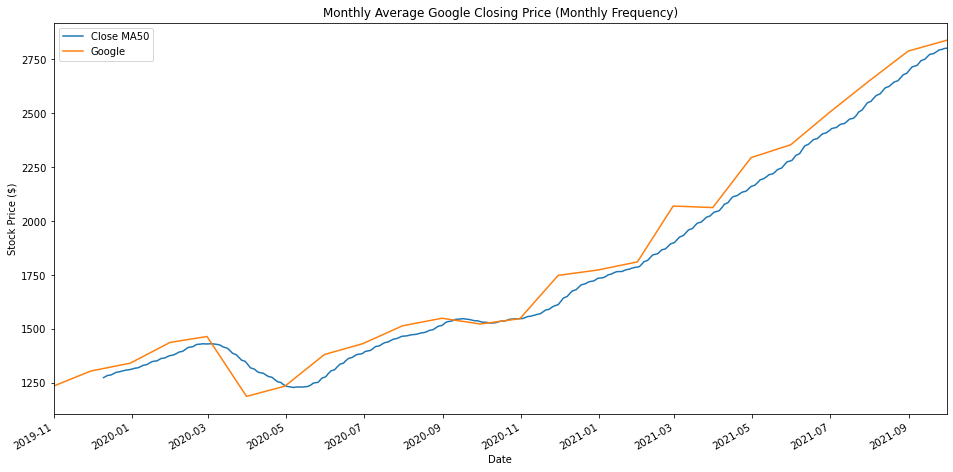

In [22]:
show_monthly("Google")

The above monthly data clearly outlines the covid-19 pandemic dip in March. It's interesting to see that apart from this correction there were only two other occasions where we see a downwards monthly trend. We can clearly see these months as they are the only places where the stock price drops below or sits very close to the 50 day moving average. From my research the reason for the poor performance in september/october of 2020 was due to the overall general tech sector sell off over speculation of vairous large cap tech companies beig overvalued. I also mentioned this in Apples performance analysis as they are both large cap tech companies. I also looked up reasons for it's other very minor slump in march of 2021. I deduced the reason for it's poor monthly performance to be due to poor US economic performance as many indexes such as the S&P and Dow Jones (which track the overall market movement in the US) dropped a couple of percent, possibly influencing a short term sell off of Google amids speculation of a larger market correction to follow. However, we see that this did not happen as we observe periods of particular growth over the second half of 2021.

### Google Quarterly Stock Visualisation
Lets now smooth out our monthly prices by looking at GOOG at quarterly frequencies. We will use the show_quarterly finction that we created when we were looking at the apple stock

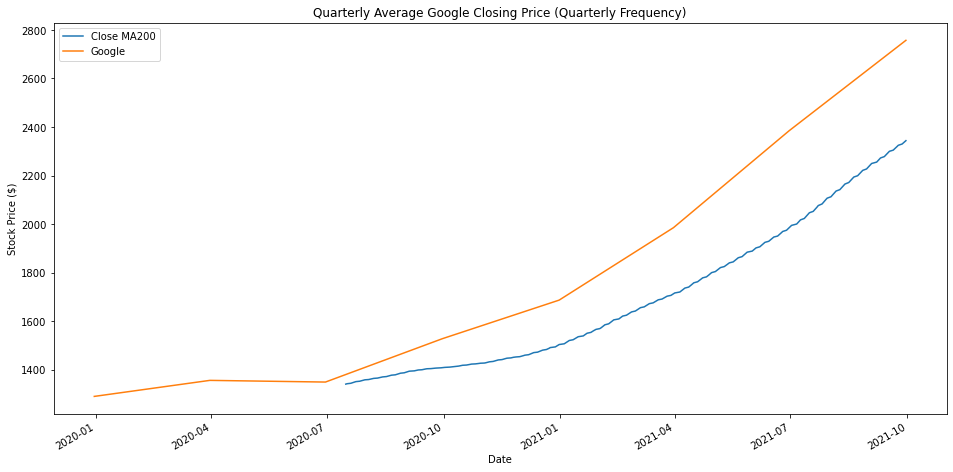

In [23]:
show_quarterly("Google")

As we can see, the quarterly frequency has smoothed out our monthly frequency and in particular we can see that in the second half of the graph Google has great seen great growth. It is necessary to point out that quarter 2 of 2020 had experienced a slight dip in performance as the stock price fell of that from the previous quarter. This as we know was due to the covid-19 pandemic as the although the period from April to June did see a recovery, it overall did not rebound fully back to the previous quarter 1 which started off strong. In conclusion we can see that the quarterly frequency lies above the 200 moving day average indicating a strong uptrend.

### Google Return Visualisation
Before we finish our Google analysis lets have a look at the daily returns of Google. We will use our show_returns_hist and show_returns_line function we created earlier to visualise this.

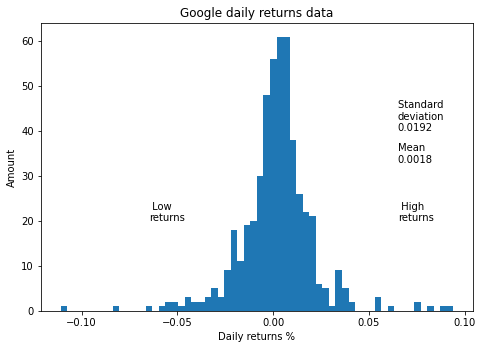

In [24]:
show_returns_hist("Google")

We can see from this histogram that much of Googles daily returns trend around the 0.00% mark if daily returns with a clear indication that theres a skew to the right of this line, telling us that taking an average of these returns like we did in the get_stats function shows us a slight positive daily return. I would like to comment that the daily returns for Google are quite volatile as we can see some outliars in our data with one day as we can see on the far left returning as low as over -10%. A 5% change over a day is quite a considerable margin if you were a short term investor.

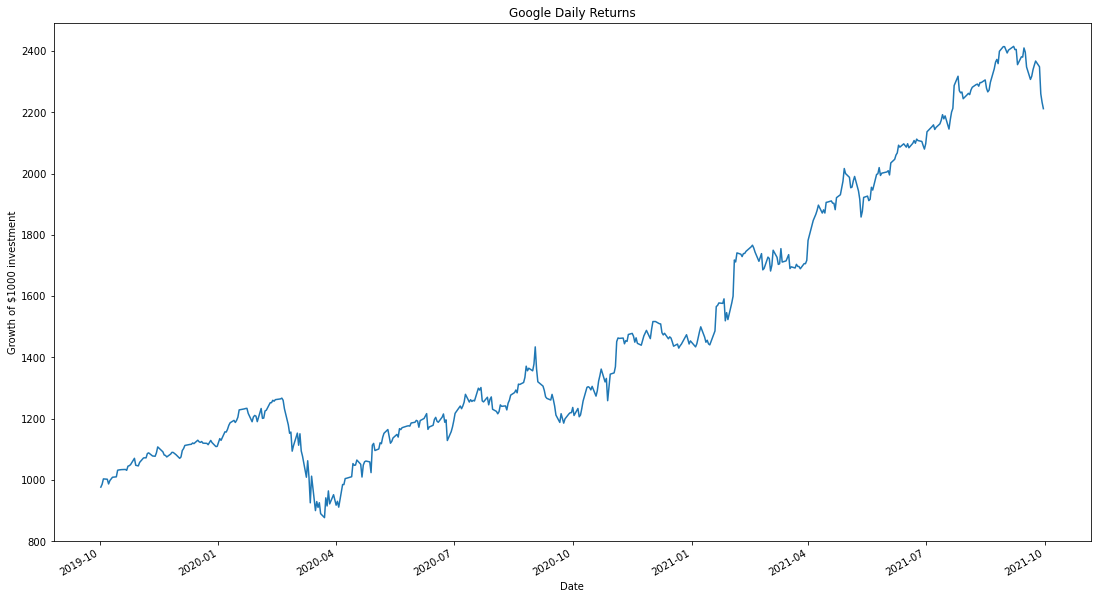

In [25]:
show_returns_line("Google")

From looking at the daily returns of google we can see that it mirrors the stock price however we mainly focus on the end value. We observe that the period of October 2020 to around september 2021 saw a gain of over $1000 on our initial investment. We can see that Google would not have been a good investment idea for a short term investor in Q1 of 2020 as we see our initial investment falls below the 1000 dollar mark due to the covid-19 pandemic. With a more long term approach with regards to investing in this stock we would disregard  the short term volatility and focus on the monthly or quarterly returns which we can see would yeild over 200% on our initial investment by the end of september 2021. This graph will be important when we are comparing ther returns of the 4 stocks together.

## eBay Stock Analysis (EBAY)
**Company Overview:** "eBay Inc. is an American multinational e-commerce corporation based in San Jose, California, that facilitates consumer-to-consumer and business-to-consumer sales through its website. eBay was founded by Pierre Omidyar in 1995, and became a notable success story of the dot-com bubble. eBay is a multibillion-dollar business with operations in over 32 countries. The company manages the eBay website, an online auction and shopping website in which people and businesses buy and sell a wide variety of goods and services worldwide." It's traded publicly of course on the NASDAQ stock exchange in the US. (taken from https://en.wikipedia.org/wiki/EBay#)

Lets again use our get_stats function to gain a better incite to eBays stock price performance over the past two years...

In [26]:
get_stats("Ebay")

,Average Clsoing Price $,Average Opening Price $,Highest Price $,Lowest Price $,Average High/Low Range $,Average Closing Standard Deviation $,Average Daily Returns %,Average Monthly Returns %,Comulutave returns of 1000$
Stock,,,,,,,,,
Ebay,51.51,51.44,77.83,26.24,1.37,12.6,0.14,3.51,1807.73


We can see that eBay appears to be the lowest priced stock out of the three that we have analysed so far. From again an investors point of view its promising to see both positive daily and montly returns. We would expect this from eBay as although it is in the consumer services sector, virtually all of it's revenue come from its eBay auction website, which eleminates the need for in person, face-to-face contact. Similarly to the other two tech stocks above, eBay does seem to have quite a high standard deviaton relativ to it's stock price. As we know this volatility benefitted eBay as we see monthly and daily growth, we still need to take into account that it's price may fluctuate both positively and negatively.

### eBay Daily Stock Visualisation
Lets again see how eBays stock price performed over our dataset time frame...

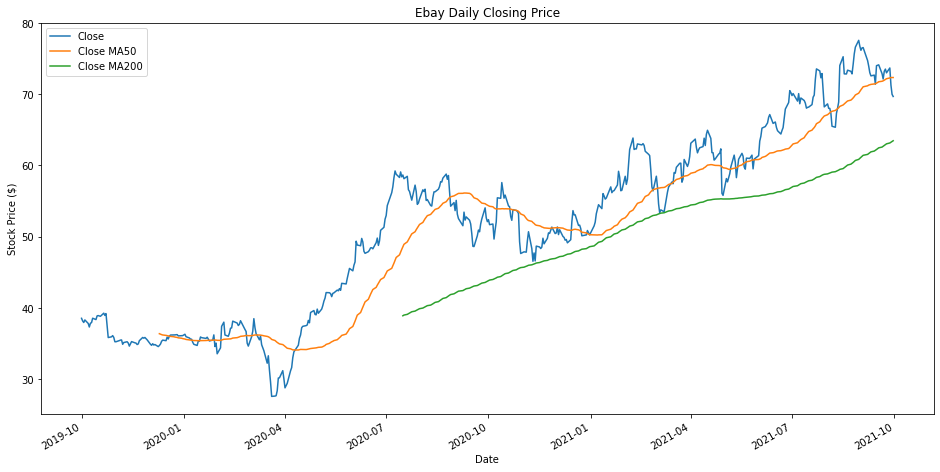

In [27]:
plot_daily("Ebay")

The first thing that points out to me is that eBay has been through an incredibly volatile period from October 2019 to the end of September 2021. We can observe that eBay has experienced many prolongued periods of uptrend and downtrend stock price motion as the stock bounces above and below of the 50 day moving average for much of the 2 year period. This is not a good sign for a short term investor as it may be tricky to predict such fluctuation. The only period of strong sustained growth is the stocks rally after the covid-19 pandemic which saw it's price drop well below 30$ but impressively doubled in price over the next 3-4 months. In terms of a long term investor we can have a positive outlook as although the daily data experiences great volatility, the 200 day moving average line continues in a steady upwards trend.

**Performance Analysis:** After doing some research to attempt to explain eBay's stock price movement I discovered that the company has been affected by many of the same reasons that Google and Apple have experienced. It will be interesting to match the correlation later on in this notebook. We know the reason for the correction in early 2020 is due to the pandemic however it's interesting to note that ebay could have been at risk of possibly falling to zero as it's stock price was relatively low, dropping to below 30$. If the majority of eBays revenue came from public interaction we could have seen a far worse outcome for the corporation. This is were I must add that after studying 3 large tech stocks, while we do see a great deal of market volatiltiy in the short term, it has to be worth pointing out that these 3 companies have very solid business models which essentially saw them benefit from a global lockdown. Sometimes it's important to not get too carried away on the statistical aspect and just focus on the numbers. Many of the worlds top investors such as Warren Buffet study extensively about how a business operates and asesses their future plans before investing in them.

I can also deduce the volatility of eBay for the period Juy-2020 to pretty much the end of the graph to be as a result of investors rotating their capital away from large cap technicaly inclined business over fears of their over valuation post the covid-19 correction as many investors feared that revenue may stall as people begin to get back to work and do not have as much free time on their hands (i.e not as many people surfing thorugh the eBay auction). I will however point out that over the pandemic there has been a huge spike in popularity over people buying and selling trading cards, most of which is auctioned through eBay. If you have a look at eBays website there is a specific page dedicated to trading card auctions. Some particular origional pokemon cards have sold for hundreds and thousands of dollars. As eBay's fee is calculated on a comission basis, a higher price sale results in larger profits. This has undoubtedly helped raise eBays revenue to over 10 billion$ in 2020, possibly helping to account for their rise in share price over the last two years.

### eBay Monthly Stock Visualisation
Lets now smooth out our daily prices by looking at EBAY at monthly frequencies. Lets use the show_monthy function we created earlier for the Apple stocK....

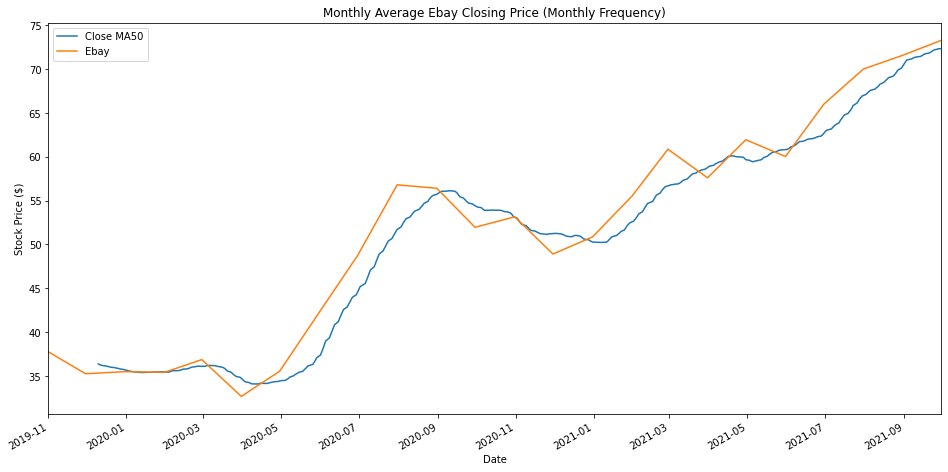

In [28]:
show_monthly("Ebay")

What I find particurlarly interesting to me about this graph is that it still remains quite volatile as we see many months of negative returns particurlarly in the latter quarter of 2020. I researched for possible reasons into this and I found out that investors were weary that eBay may suffer from a lack of diversity when compared to Amazon which has subsiduaries like AWS (Amazon Web Service) which grossed over 15 billion$ last year alone. eBay may need to consider options of a possible large scale expansion or investment into fast growing tech sctors such as cluod development or they could be at risk of falling behind other tech giants due to this lack of revenue diversity.

### eBay Quarterly Stock Visualisation
Lets now see if we can mitigate the volatile monthly stockprice by analysting eBays stock price at a quarterly frequency.

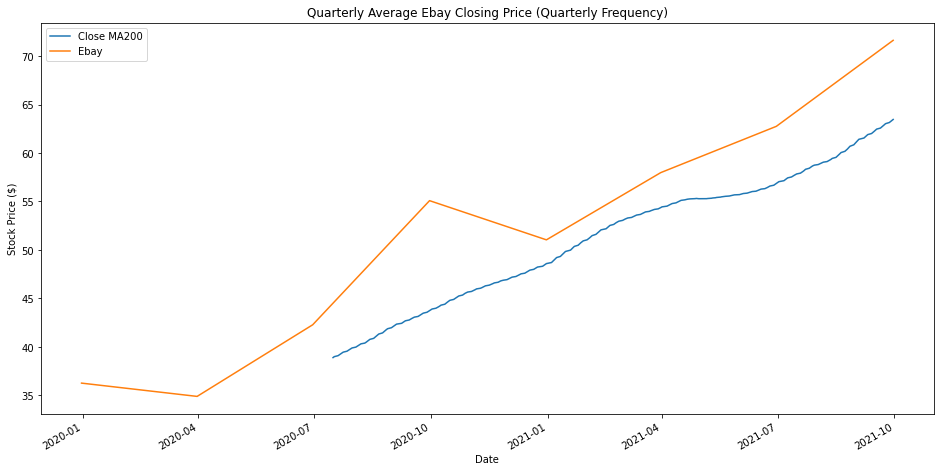

In [29]:
show_quarterly("Ebay")

From this quarterly graph we can see that over the course of two years ebays only negative quarter came in Q4 of 2020. I had a look at eBay's Q4 report and it seemed as though they had a better than expected 4th quarter. They had also seen a double digit increase in their luxury watch GMV (Gross Merchandise Volume) due to their sucessful implementation their Authenticity Guarantee service for watches and quickly rolled the service to sneakers. Sneaker GMV  also experienced great growth. However i believe the drop price was due to eBays less than average revenue predictions for Q4 which led to invetsors jumping ship over speculation of poor returns and dividends pay. Thankfully for eBay, revenue was better than expected and we can see a stead uptrend in share price in 2021, which is highlighted by the 200 moving day trend line.

### eBay Return Visualisation
Before we finish our eBay analysis lets have a look at the daily returns of eBay. We will use our show_returns_hist and show_returns_line function we created earlier to visualise this.

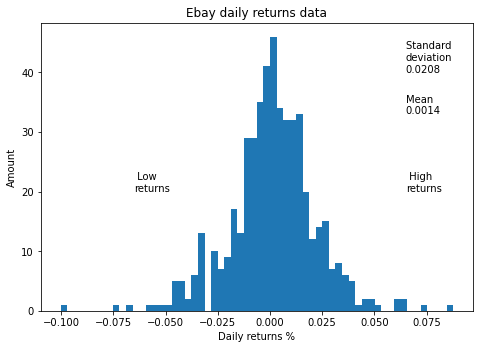

In [30]:
show_returns_hist("Ebay")

Similar to the other two stocks and as expected, we can see eBays volatility clearly with frequent daily return values converging well over 2.5% and -2.5%, this is quite alot for a daily closing percent change. However most of our data trends beside the 0.0% line. We can see from our calculated standard deviation of the data, that on any given day, there is a 68% chance that our returns will be around 2% above and below of our mean of around .14%, which indicates a large fluctuation.

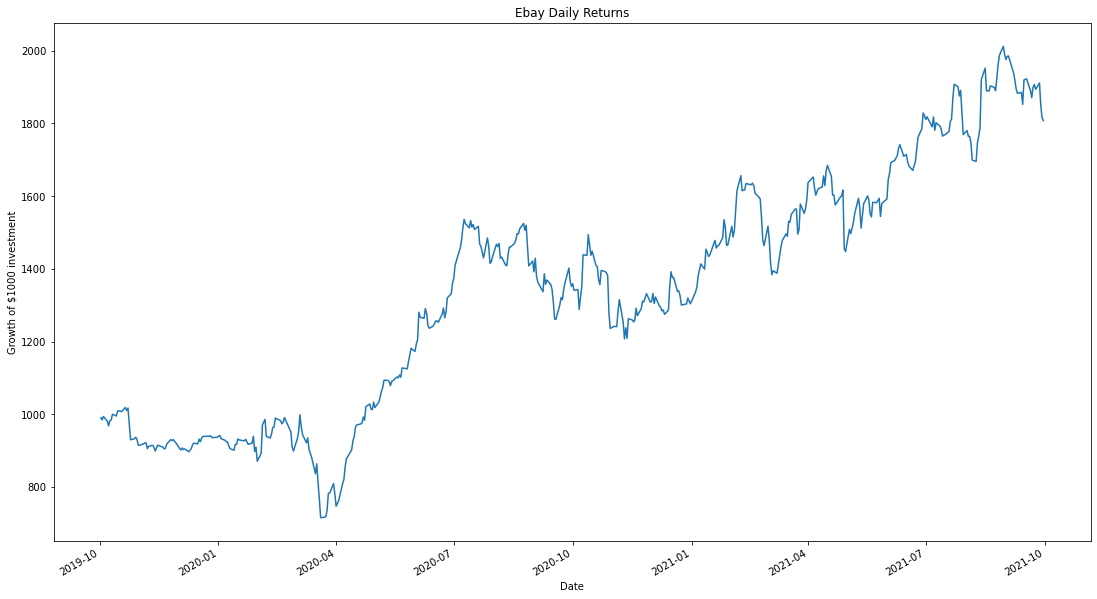

In [31]:
show_returns_line("Ebay")

As I explained earlier the main function of this graph is to help us compare our ROI when we look at the stocks together. However, it's interesting to see how our initial investment fluctuates and we begin to see some profitable returns as a whole, with our investment delivering an 80% ROI over the course of the two years.

## Pfizer Stock Analysis (PFE)
**Company Overview:** "Pfizer Inc. is an American multinational pharmaceutical and biotechnology corporation headquartered in New York City. The company was established in 1849 in New York by two German immigrants, Charles Pfizer (1824–1906) and his cousin Charles F. Erhart (1821–1891).

Pfizer develops and produces medicines and vaccines for immunology, oncology, cardiology, endocrinology, and neurology. The company has several blockbuster drugs or products that each generate more than US$1 billion in annual revenues." More topically they were one of the first companies to develop a vaccine for the covid-19 virus. Interestingly they invested over 2 billion dollars of their own money into researching the vaccine as they didn't want to be influenced by the US government, who offered to delover them funing on research. Pfizer trades on the New York Stock Exchange (NYSE). (Adapted and taken from https://en.wikipedia.org/wiki/Pfizer)

Lets again use our get_stats function to gain a better incite to Pfizer's stock price performance over the past two years...

In [32]:
get_stats("Pfizer")

,Average Clsoing Price $,Average Opening Price $,Highest Price $,Lowest Price $,Average High/Low Range $,Average Closing Standard Deviation $,Average Daily Returns %,Average Monthly Returns %,Comulutave returns of 1000$
Stock,,,,,,,,,
Pfizer,36.78,36.81,51.86,26.45,0.75,3.84,0.07,1.05,1306.41


Straight away we can see that Pfizer appears to be way more stable than the other 3 stocks with the average high/low range under 1$ and its standard deviation indicating reduced volatility. However, it's interesting to note that the daily and more strikingly monthly returns are way down in comparison. Could lower risk imply lower returns? Most definately! We observe from the average opening and closing price that there is not much daily fluctuation at all, with there on average being only 3c in the difference. This means that the stock has no room for growth or more imporantly, no room for a downwards skew in the eyes of a short term investor. It's promising to see that we see positive returns and an investment of 1000 dollars would yeild us a steady profit of over 1300 dollars.

### Pfizer Daily Stock Visualisation
Lets again see how Pfizers stock price performed over our dataset time frame...

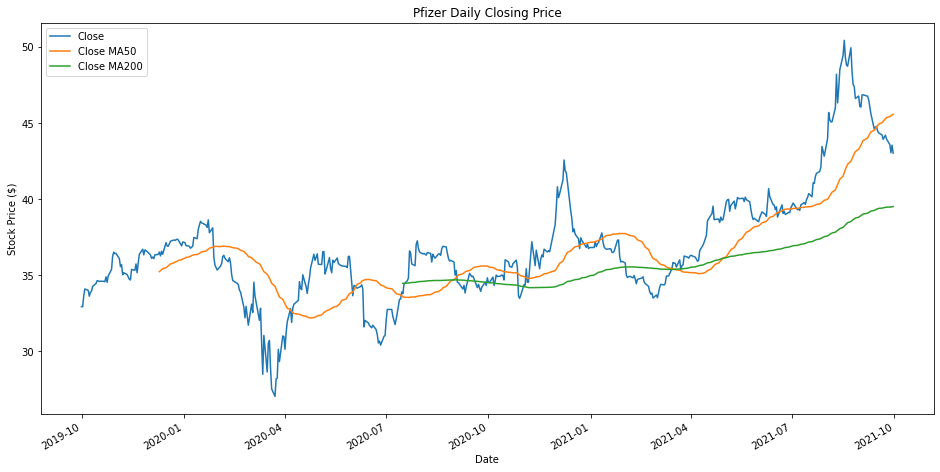

In [33]:
plot_daily("Pfizer")

This is startling. It appears that my assumptions above are incorrect! Pfizer appears to be incredibly volatile as we see both moving average lines cross over each other an the stock. This outlines how important representing the data on a graph is. We can observe that Pfizer has been through a very volatile 2 years and has observed many spikes and dips in its stock price. As this is the only non technical company I am analysing I will attemt to study and explain the reason for the stock price spikes in late 2020 and in August of 2021, and also its dips in march of 2020, june of 2020 and finally more recently in september of 2021.

**Performance Analysis:**

**Dip in February/March, 2020:** From some quick research its clear that the drop in stock price durinG the early part of 2020 was due to the covid 19 pandemic. I think i can conclude that there was a market wide correction during this period as all four of the stocks I have analysed follow a downward trend during this period. However we see that Pfizer rebounds over the month of April as it begins to announce plans of attempting to discover a vaccine for the virus.

**Dip in June, 2020:** from some exploration i found that much of the decline in June is tied to a clinical trial failure for Pfizer's breast cancer drug Ibrance, but investors also appeared to have been spooked by chief business officer of Pfizer, John Young's comments that imply the company isn't focused on making money off the COVID-19 vaccine it's developing with BioNTech. Pfizers intention not no make a profit from the vaccine means there may be poor returns over the coming months forecast as research may be expensive and time consuming.

**Dip in September, 2021:** The recent decline in September of this year can be attributed to rising concerns over the Biden administration’s plan to reduce healthcare costs, including negotiating the drug prices in its Medicare program. This has resulted in a sell-off in some of the large pharmaceutical stocks, including Pfizer.
 

**Spike in late 2020:**  From what I have reat i believe the reason for the spike in stock price during the latter part of 2020 was due to several governments approving the use of the Pfizer vaccine, this good news attracted investors as this may lead to increased revenus over this quarter.

**Spike in september 2021** The stock price of Pfizer has saw a rise of 21% in a month following multiple positive developments, including positive data for its oral Covid-19 treatment pill, upbeat Q3 results, and more recently, closing the acquisition of Trillium Therapeutics for 2.3 billion. Pfizer announced its plans to acquire Trillium in August this year, while it made an initial investment of 25 million last year. Trillium Therapeutics Inc. is a clinical stage immuno-oncology company. The Company develops therapies for the treatment of cancer and has preclinical programs, targeting the immunoregulatory pathways that tumor cells exploit to evade the host immune system. Investors saw this as a positive move from Pfizer.

### Pfizer Monthly Stock Visualisation
Lets now smooth out our daily prices by looking at PFE at monthly frequencies. Lets use the show_monthy function we created earlier to observe this graph....

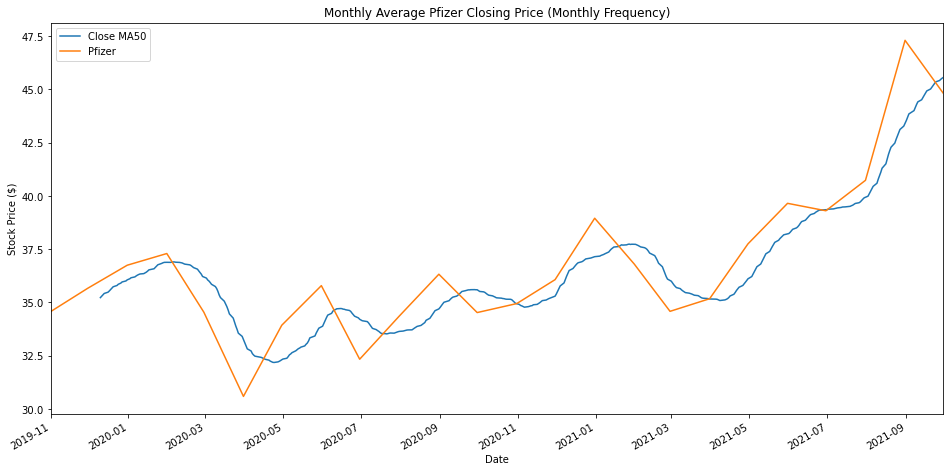

In [34]:
show_monthly("Pfizer")

We could argue that this stock has show the most volatile monthly average closing price out of the 4. We can clearly see the covid-19 correction over march of 2020 and the various spikes and dips as we follow the graph along its two year cycle, the reason for them are explained in the performance analysis above. We see that the 50 day moving average line is has embedded itself within the graph, highlighting a very volatile and uncertain periof for Pfizer, with no real upward trend showing until Q2 of 2021.

### Pfizer Quarterly Stock Visualisation
Lets now see if we can mitigate the volatile monthly stockprice by analysting Pfizers stock price at a quarterly frequency. Lets use the show_quarterly() function to show this.

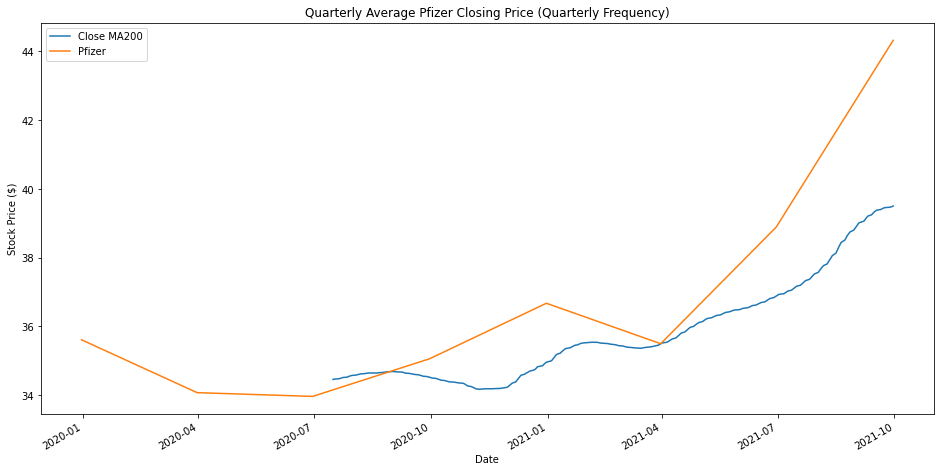

In [35]:
show_quarterly("Pfizer")

Interestingly, this graph elegantly shows us a downtrend, followed by an uptrend, followed by a short quarterly downtrend, then finally outlines a prolongued uptrend. We can clearly see that there were two periods where Pfizer's quarterly stock price was suffering and two periods where it begain to rebound. we can interestingly see the dip during Q1 of 2020 which I did not outline in my performance analysis of Pfizer at the start of the report. Upon researching this I realised that the whole US market experienced a slump over the early months of 2020 for many reasons including a second wave of the covid-19 virus which threatened tighter global restritions again. We can observe however in recent Quarters that it has sustained agood level of growth.

### Pfizer Return Visualisation
Before we finish our Pfizer analysis lets similarly have a look at the daily returns of Pfizer. We will use our show_returns_hist and show_returns_line function we created earlier to visualise this.

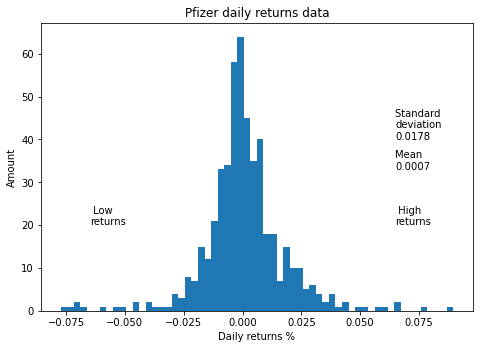

In [36]:
show_returns_hist("Pfizer")

From the daily returns histogram we can observe that the spread does seem to plot alot tighter to the mean of .07%. This is factually true as we observe a smaller standard deviation; 68% of daily returns value lie 1.78% above and below the mean. This could lead me to deduce that even though we have a tighter standard deviation we still do observe a notable amount of volatility on daily, monthly and quarterly stock price graphs. In my opinion this is because over the 2 year period the stock price hasn't changed as much as the other 3 companies stock price, which implies more values will tend to plot closer to the mean.

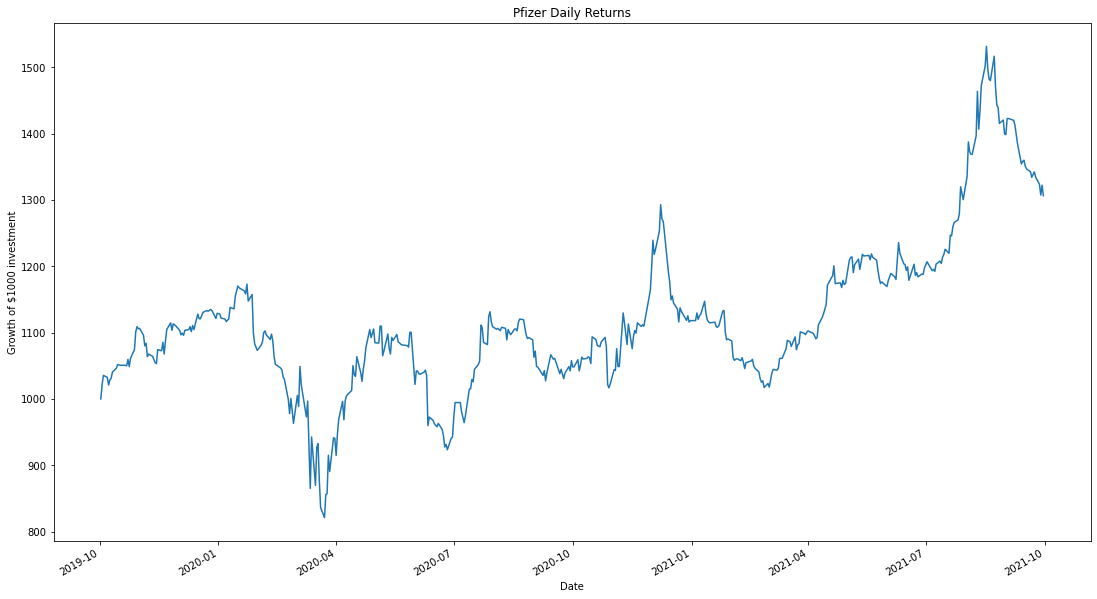

In [37]:
show_returns_line("Pfizer")

As expected, our daily commulative return graph is quite volatile as it mirrors our daily stock price graph. For an experienced day trader this could have an opportunity to make some sizeable returns as there is plenty of scope for profitable trades accross the 2 year period. As a whole we see a slight positive trend from when we started a ROI of around 30% is observed even after its sizeable dip in september of 2021.

# Time Series Comparison
Lets now compare and discuss the similarity of the trends 
appearing in the different series. Sililarly we will compare the stocks at daily, monthly and quarterly frequencies, as well as looking at their returns.

## Daily Stock Comparison
Let's compute a function to visualise what the closing price data looks like together on the same graph. Our Function will take in the frequency as an argument. **Because Googles stock price is so much bigger than the other values I am going to multiply all its closing values by .1 so we will be able to see a clear comparison of the data.**

In [38]:
def show_stocks(freq):
    if freq=="Day":
        df_stocks["Apple"]["Close"].plot(label="APPL",figsize=(16,8),title="Daily Closing Price",color=stock_color["Apple"])
        (df_stocks["Google"]["Close"]*.1).plot(label="GOOG",color=stock_color["Google"])
        df_stocks["Ebay"]["Close"].plot(label="Ebay",color=stock_color["Ebay"])
        df_stocks["Pfizer"]["Close"].plot(label="Pfizer",color=stock_color["Pfizer"])

        plt.ylabel("Price")
        plt.xlabel("Date")
        plt.legend()
        plt.show();
        
    elif freq=="Month":
        (df_stocks["Apple"]["Close"].groupby(pd.Grouper(freq='M')).mean()).plot(label="APPL",figsize=(16,8),title="Monthly Closing Price",color=stock_color["Apple"])
        ((df_stocks["Google"]["Close"]*.1).groupby(pd.Grouper(freq='M')).mean()).plot(label="GOOG",color=stock_color["Google"])
        (df_stocks["Ebay"]["Close"].groupby(pd.Grouper(freq='M')).mean()).plot(label="Ebay",color=stock_color["Ebay"])
        (df_stocks["Pfizer"]["Close"].groupby(pd.Grouper(freq='M')).mean()).plot(label="Pfizer",color=stock_color["Pfizer"])
        
        plt.ylabel("Price")
        plt.xlabel("Date")
        plt.legend()
        plt.show();
        
    elif freq=="Quarter":
        (df_stocks["Apple"]["Close"].groupby(pd.Grouper(freq='Q')).mean()).plot(label="APPL",figsize=(16,8),title="Quarterly Closing Price",color=stock_color["Apple"])
        ((df_stocks["Google"]["Close"]*.1).groupby(pd.Grouper(freq='Q')).mean()).plot(label="GOOG",color=stock_color["Google"])
        (df_stocks["Ebay"]["Close"].groupby(pd.Grouper(freq='Q')).mean()).plot(label="Ebay",color=stock_color["Ebay"])
        (df_stocks["Pfizer"]["Close"].groupby(pd.Grouper(freq='Q')).mean()).plot(label="Pfizer",color=stock_color["Pfizer"])
        
        plt.ylabel("Price")
        plt.xlabel("Date")
        plt.legend()
        plt.show();
    else:
        print("Error, invalid command please type in either; Day, Month or Quarter")
        

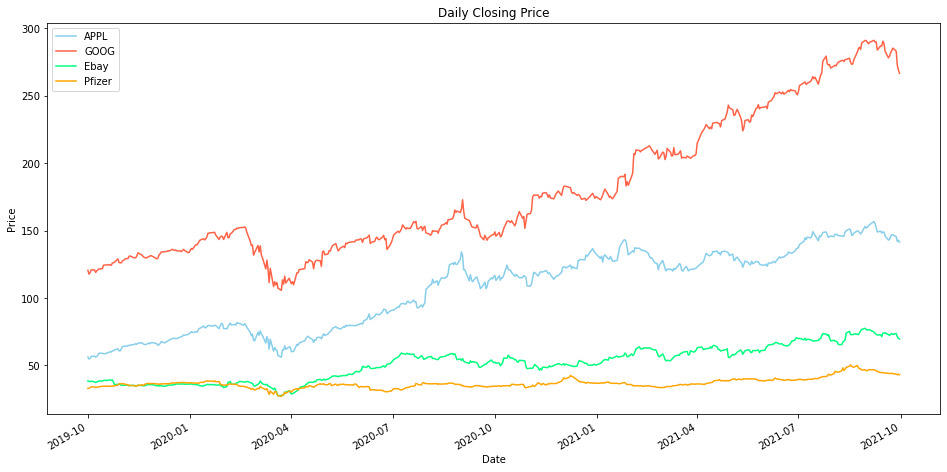

In [39]:
show_stocks("Day")

This is quite interesting. This graph really outlines the effect of the market drop in february/march of 2020 as all stocks appear to follow the same trend downwards. It's also fascinating to see how similar Google and Apples stock price movements are as in some cases particurlarly in the first half of the graph they appear to mirror themselves. Its also interesting to see the relationship of Pfizer an Ebay have. We can see at the height of the covid-19 dip in early 2020 they are sitting at around the same price but Ebay appears to have rebounded better, this is probably due to their revenue not being affected by a global lockdown.  

## Monthly Stock Comparison

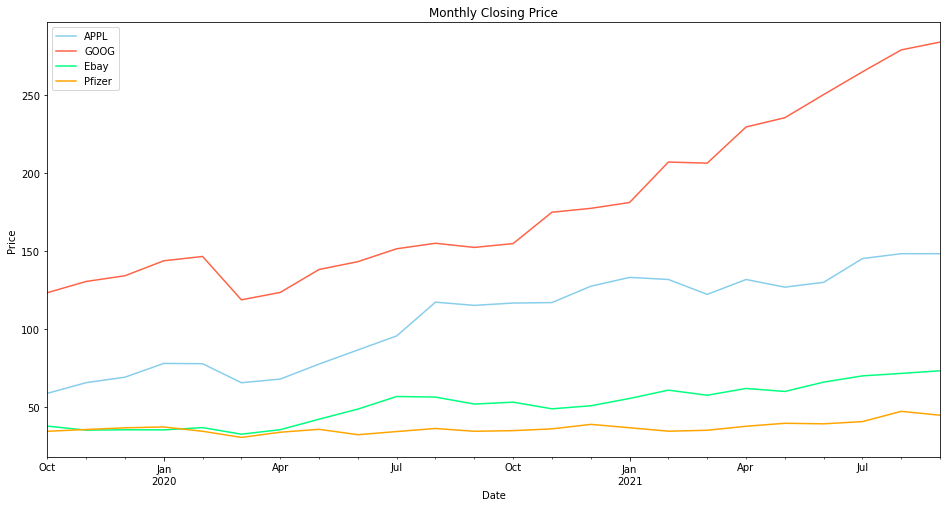

In [40]:
show_stocks("Month")

As we move onto the monthly graph we can still see the effect of covid-19 on the US economy. The monthly frequency also shows us Pfizers volatile couple of years with not much growth. The other three companies do experience volatility however their overall trend is upward which contrasts to Pfizers static movement.

## Quarterly Stock Comparison

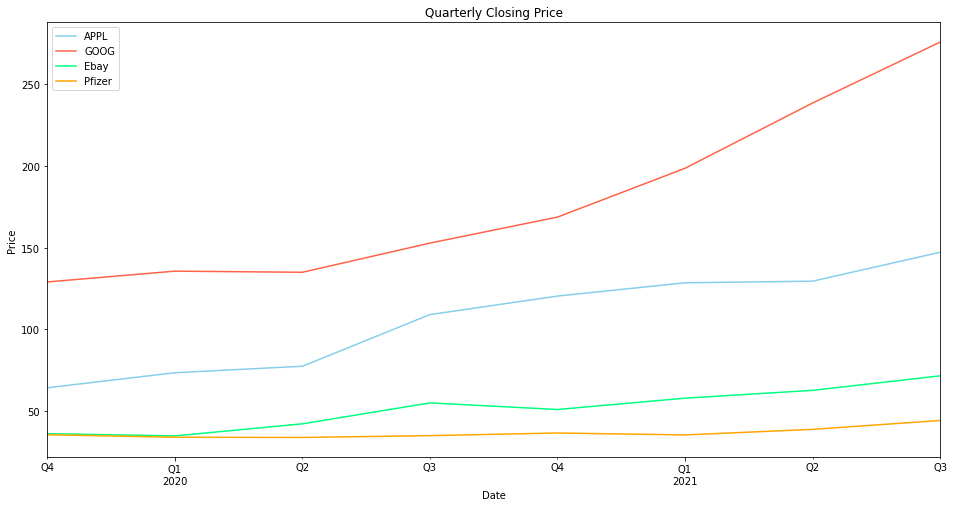

In [41]:
show_stocks("Quarter")

When we examine closing stock price at a quarterly frequency whe can see that Google is growing from strength to strengthas well as Apple. Although Ebay and Pfizer haven't experienced as much growth as the two tech giants we can see slight trends upwards. Pfizer fares better in this quarterly graph as previously with the other graphs we were unable to see if their share price was moving up or just staying stagnant. 

## Daily Accumulative Return Comparison
The part we have all been waiting for! Lets see which company makes the best return on a 1000$ initial investment.

In [42]:
def show_daily_returns_stocks():
    #calculate daily returns using pandas .pct_change() function 
    daily_returns_a=df_stocks["Apple"]["Close"].pct_change()
    #cumulative returns can be calculated using the numpy .cumprod() function
    daily_cumu_returns_a=round((daily_returns_a+1).cumprod()*1000,2)
    
    #calculating Google daily returns
    daily_returns_g=df_stocks["Google"]["Close"].pct_change()
    daily_cumu_returns_g=round((daily_returns_g+1).cumprod()*1000,2)
    
    #calculating Ebay daily returns
    daily_returns_e=df_stocks["Ebay"]["Close"].pct_change()
    daily_cumu_returns_e=round((daily_returns_e+1).cumprod()*1000,2)
    
    #calculating Pfizer daily returns
    daily_returns_p=df_stocks["Pfizer"]["Close"].pct_change()
    daily_cumu_returns_p=round((daily_returns_p+1).cumprod()*1000,2)
    
    fig = plt.figure()
    ax1 = fig.add_axes([0.05,0.05,0.9,0.9])
    
    daily_cumu_returns_a.plot(label="APPL",figsize=(14,7),title="Daily Closing Price",color=stock_color["Apple"])
    daily_cumu_returns_g.plot(label="GOOG",color=stock_color["Google"])
    daily_cumu_returns_e.plot(label="Ebay",color=stock_color["Ebay"])
    daily_cumu_returns_p.plot(label="Pfizer",color=stock_color["Pfizer"])


    ax1.set_xlabel("Date")
    ax1.set_ylabel("Growth of $1000 investment")
    ax1.set_title("Accumulative Daily Returns of a 1000$ investment ")
    plt.legend()
    plt.show();

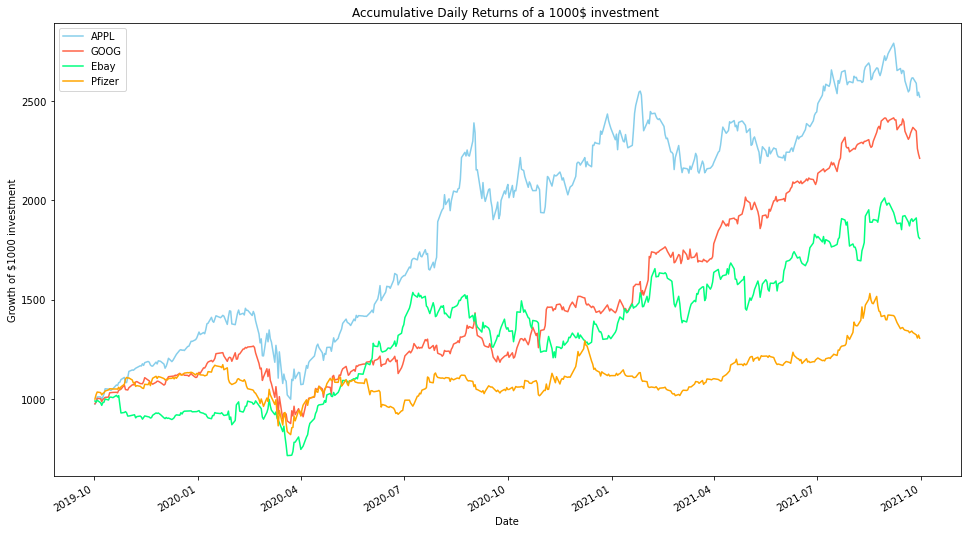

In [43]:
show_daily_returns_stocks()

These results are very interesting. I'm sure the average person was expecting Google to have the highest returns by far based pn the stock price graphs above, however, the returns are relative to stock price. If we follow the accumulative all the way to the end we find that apple has had the most impressive gain with a ROI of over 250%! this is closely followed by Google, Ebay then Pfizer which sees is returns fall well below the other three. This leads me to believe that over the past two years Tech/ Digital based companies have fared exceotionally well since the covid-19 pandemic. However we could deduce that there is an overall uptrend in the market as Pfizer still manages to make a positive return. From my research however I believe a general trend upwards in the market is in order as it tends to follow inflation levels of between 1.5% - 2.5% annually. Still, better than keeping your money in the bank!

## Correlation & Similarity
Lets have a look an see which stocks correlate the most so we can find based on our data, which are the most similar. A correlation of 1 indicates that there is a direct correlation betwee the two entries. A correlation of -1 indicates that there is a direct negative correlation. A correlation of 0 shows no linear relationship between the movement of the two variables.

### Closing Stock Price Correlation
Lets create a finction to merge the closing prices together into a seperate dataframe.

In [44]:
def merge_close():
    col={}
    for stock in stock_ticker:
        #create columns in our new dataframe from the closing columns for each stock
        col["%s Closing Price"%stock]=df_stocks[stock]["Close"]
        
    #merge the columns and add them onto the eisting columns
    df_merged = pd.DataFrame(col).sort_index()
    
    return df_merged.dropna()

In [45]:
df_close=merge_close()

This plot_heatmap()function below will help us to clearly see which stocks correlate the most

In [46]:
def plot_heatmap(title, df_in, figsize=(5.5, 5)):
    df_corr = df_in.corr()
    # create a color palettte
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # display the heatmap
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df_corr, square=True, cbar=False,
                annot=True, cmap=cmap, linewidths=0.5, vmin=-1)
    ax.set_title(title)

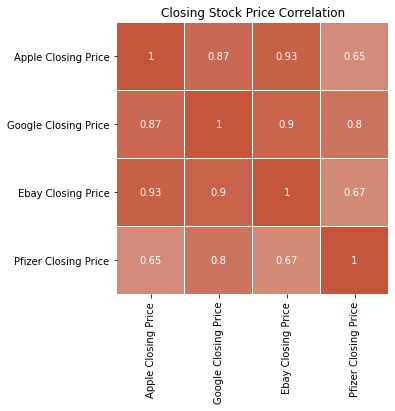

In [47]:
plot_heatmap("Closing Stock Price Correlation", df_close, figsize=(5,5))

From this heatmap we can see that the strongest correlation is between Apples and Ebays Closing Price. The weakest correlation is between Pfizer and Apple. Overall though there is a very strong correlation between each tech related stock in particular (Ebay, Apple, Google). The lowest correlation only being .65 indicates to me that these stocks are all influenced by the US market as they all trade on a US exchange.

### Return Price Correlation
Lets create a finction to merge the daily return prices together into a seperate dataframe.

In [48]:
def merge_return():
    col={}
    for stock in stock_ticker:
        col["%s Daily Returns"%stock]=df_stocks[stock]["Close"].pct_change()
        
    #merge the columns and add them onto the eisting columns
    df_merged = pd.DataFrame(col).sort_index()
    
    return df_merged
    

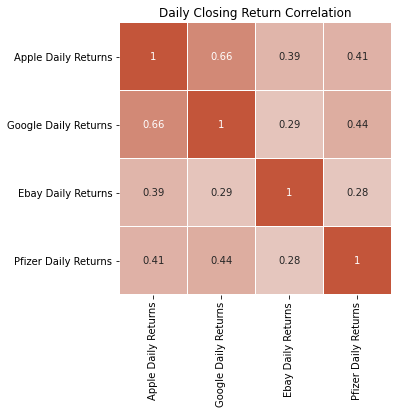

In [49]:
df_return=merge_return()
plot_heatmap("Daily Closing Return Correlation", df_return, figsize=(5,5))

When compared to the daily closing price heatmap above, the returns seem to have a weeker correlation, however, they are all still positive. The strongest correlation is between Apple and Google, which we expected from the daily returns line plot a few cells above: they followed a very similar pattern. The weakest returns is observed between Ebay and Pfizer. It's interesting to note that Ebay and Google also have a relativey week correlation.

### Moving Average Correlation
Lets create a finction to merge the 50 and 100 moving average prices together into a seperate dataframe.

In [50]:
def merge_MA():
    col={}
    for stock in stock_ticker:
        #create columns in our new dataframe from the various columns for each stock
        col["%s 50MA"%stock]=df_stocks[stock]["Close MA50"]
        col["%s 200MA"%stock]=df_stocks[stock]["Close MA200"]
        
    #merge the columns and add them onto the eisting columns
    df_merged = pd.DataFrame(col).sort_index()
    
    return df_merged

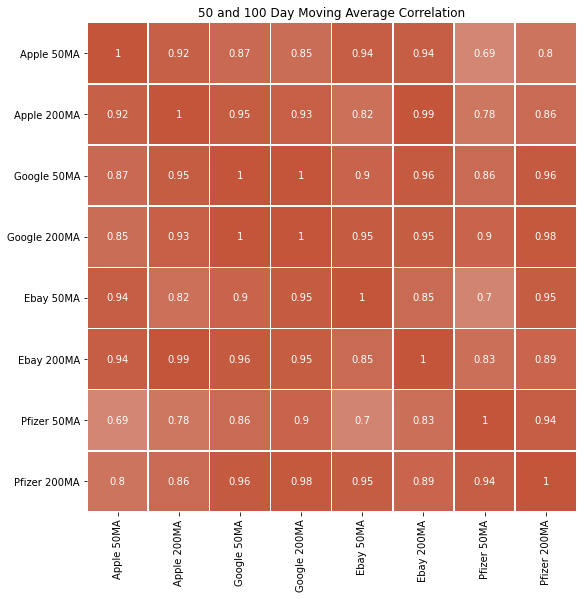

In [51]:
df_MA=merge_MA()
plot_heatmap("50 and 100 Day Moving Average Correlation", df_MA, figsize=(9,9))

From this heatmap there is without a doubt a very strong correlation between the moving averages across all stocks. I deduce this largely being due to the fact that as I mentioned above, all of these company trade in the US market, so they are influenced by the general movement of the US market (indicators such as the S&P 500 track this movement). The reason to why the moving average outlines this the best is because it smoothens out the daily fluctuations and gives you a general incite ot how the stock is performing over a longer, more stable period of time.

### All Variables Correlation
Lets create a finction to merge all the columns we want together into a seperate dataframe. The columns we will be using is the close, open, high and low from each stock as well as the daily returns.

In [52]:
def merge_all():
    col={}
    for stock in stock_ticker:
        col["%s Closing Price"%stock]=df_stocks[stock]["Close"]
        col["%s Low Price"%stock]=df_stocks[stock]["Low"]
        col["%s High Price"%stock]=df_stocks[stock]["High"]
        col["%s Open Price"%stock]=df_stocks[stock]["High"]
        col["%s Daily Returns"%stock]=df_stocks[stock]["Close"].pct_change()
        
    #merge the columns and add them onto the eisting columns
    df_merged = pd.DataFrame(col).sort_index()
    
    return df_merged

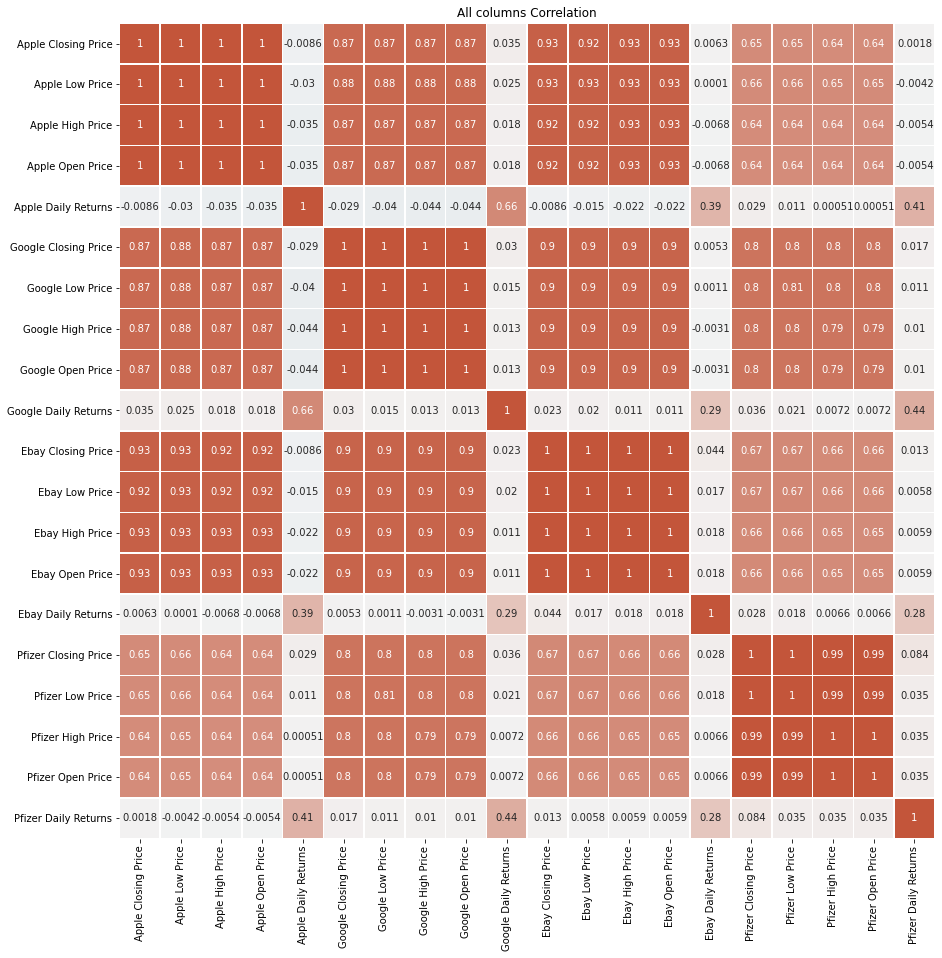

In [53]:
df_all=merge_all()
plot_heatmap("All columns Correlation", df_all, figsize=(15,15))

The main observation I van gather from this elegantly symmetrical heatmap above is that there tends to be no relationship between the daily stock price and the daily returns. I'm guessing this is due to the percentage change value being so small in relation to the stock price values as in my opinion I believe a relatively high closig price should imply a relatively high return value.

# Stock Price Forecasting - Monte Carlo Simulation with Brownian Motion
I thought it would be interesting to see if we could implement the monte carlo simulation on our stocks to see if we can attempt to predict how the stock will perform over the next year, based on the data we took from each stock.


Monte Carlo Simulation can be quite difficult to explain but effectively what we are going to do is simulate alot of random stock predictions based on the pevious data we collected about the stock. We will use a mathematical formula known as the Brownian motion to predict the daily return of the stock and the monte carlio simulation will be used to generate 1000's of results of this formula which will help make our answer more precise (basic probability: more results implies a more accurate result). The Brownian motion is made up of two components for the most part: volatility (how succeptable the stock is to fluxuations) and drift (the way in which the returns have swayed in the past, uptrend or downtrend). The end formula looks quite complicated but we will work through it step by step below...

Lets create a function so we can use this for all our stocks

In [54]:
def calculate_monte_carlo(stock):  
    #calculating log returns
    log_returns = np.log(1 + df_stocks[stock]["Close"].pct_change())
    #calculating mean
    u = log_returns.mean()
    #calculating variance
    var = log_returns.var()
    #calculating drift
    drift = u - (0.5 * var)
    #calculate standard deviation of log returns
    stdev = log_returns.std()
    #This newly created array used the probabilities generated by the “rand” function and converts them into 
    #distances from the mean 0, as measured by the number of standard deviations which acts as our random variable Z
    Z = norm.ppf(np.random.rand(365,10000))

    days = 365
    simulations = 10000
    
    #Brownian calculation drift +standard deviation *e^r, this will calculate our daily returns on any particular day in 
    #the future
    daily_returns = np.exp(np.array(drift) + np.array(stdev) * Z)

    #S0 equivicates to the first price in our price list,which is the last closing price available too us which will be S0 in 
    #our for loop below, this starts off the prediction 
    S0 = df_stocks[stock]["Close"].iloc[-1]
    
    #creating an array full of zeros with the daily_returns as argument this makes both arrays the sam size
    price_list = np.zeros_like(daily_returns)
    
    #filling or first entry of the list of 10,000 columns(instances) with S0 
    price_list[0] = S0

    #this for loop calculates the random price of each of the 10,000 instances for each day
    for t in range(1, days):
        price_list[t] = price_list[t - 1] * daily_returns[t]
        
    #for loop below calculates probability of breaking even by counting how many times the stock price on the last day is more
    #than the origional starting price
    count=0
    total=10000
    for key in pd.DataFrame(price_list).iloc[-1]:
        if key>=df_stocks[stock]["Close"].iloc[-1]:
            count+=1
    #percentage for above loop calculated here     
    p_even=round((count/total)*100,2)
    
    #expected value calculated by mean of the final prices on day 365
    expected_val= round(pd.DataFrame(price_list).iloc[-1].mean(),2)
    #annual return on investment calculated using simple formula
    annual_exp_roi=round(((expected_val-df_stocks[stock]["Close"].iloc[-1])/df_stocks[stock]["Close"].iloc[-1])*100,2)
    #returns highest price on day 365
    max_val=round(pd.DataFrame(price_list).iloc[-1].max(),2)
    #returns lowest price on day 365
    min_val=round(pd.DataFrame(price_list).iloc[-1].min(),2)
    
    #plotting line plot of daily forecasting
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_axes([0,0,1,1])
    
    ax1.text(400,(pd.DataFrame(price_list).iloc[-1].max()),"Expected Value: "+str(expected_val)+"$")
    ax1.text(400,(pd.DataFrame(price_list).iloc[-1].max())*.9,"Probability of Returning a profit: "+ str(p_even)+"%")
    ax1.text(400,(pd.DataFrame(price_list).iloc[-1].max())*.8,"Expected Annualised Return: "+ str(annual_exp_roi)+"%")
    ax1.text(400,(pd.DataFrame(price_list).iloc[-1].max())*.7,"Max Price: "+str(max_val)+"$")
    ax1.text(400,(pd.DataFrame(price_list).iloc[-1].max())*.6,"Min Price: "+str(min_val)+"$")

    plt.plot(price_list)
    plt.title(stock+" Monte Carlo Simulation of 10000 outcomes from 1-10-2021 to 1-10-2022")
    plt.xlabel("Day")
    plt.ylabel("Price ($)");

    #plotting histogram of final prices
    end_price=pd.DataFrame(price_list).iloc[-1]
    
    fig1 = plt.figure(figsize=(4,2))
    ax2 = fig1.add_axes([0,0,1,1])
    end_price.plot.hist(bins = 60)
    ax2.set_xlabel("price after 365 days ($)")
    ax2.set_ylabel("Frequency")
    ax2.set_title(stock+" price after 365 days ($)")
    
    
    plt.show()

Lets see if this function worked! Bare in mind it may take a while to run this cell as it has alot of calculations to do!

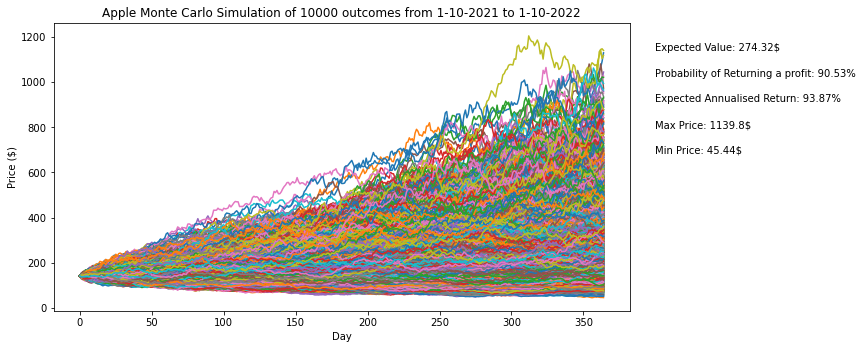

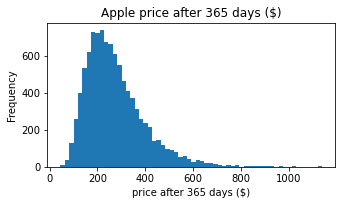

In [55]:
calculate_monte_carlo("Apple")

These results are fascinating! We can begin to quantify the sheer amount of trials that has taken place by looking at the line plot above. We can see some interesting statistics to the top right. Arguably the most important are the expected annualized return and the probability of breaing even. We can see that Apple has a very promising forecast based on this predictioon with an expected return of around 93% coupled with a very high 90% chance of breking even.

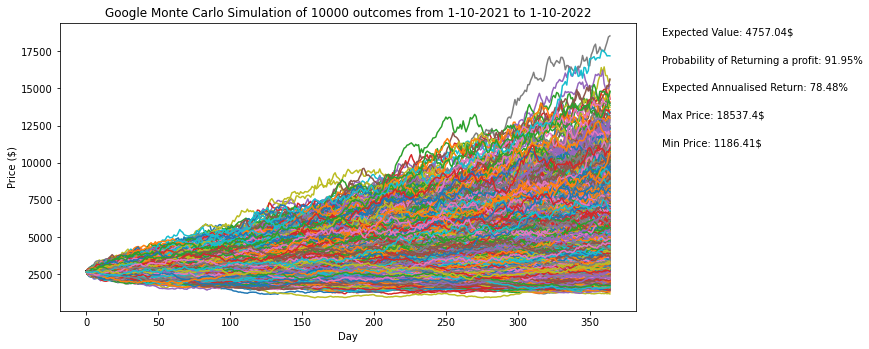

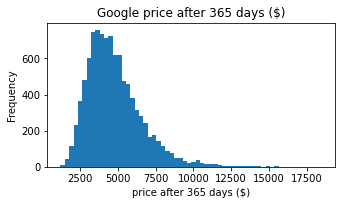

In [56]:
calculate_monte_carlo("Google")

We again see that Google has a very positive forecast with predicted returns and probability of breaking even over the 90% mark

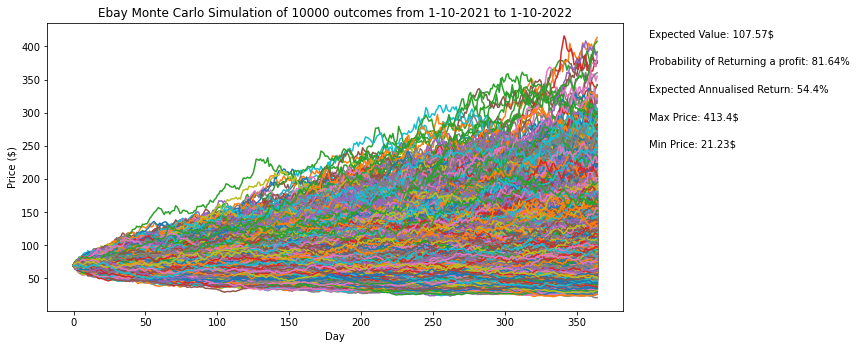

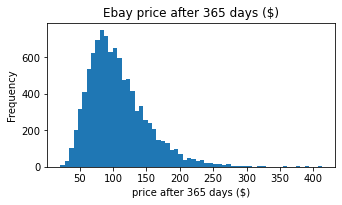

In [57]:
calculate_monte_carlo("Ebay")

Again with Ebay we can see positive annual returns of 50% coupled with a very healthy 81% off returning some sort of profit. If we also have a look at the distribution of the final values on day 365 displayed on the histogramabove we can see that the data has a clear skew to the right, indicating that positive returns are likely

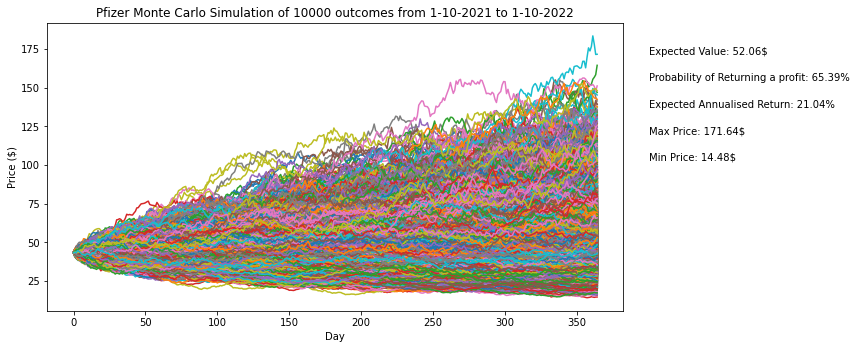

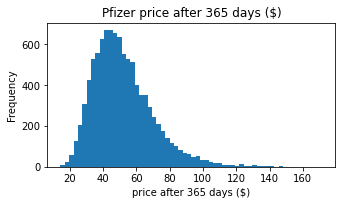

In [58]:
calculate_monte_carlo("Pfizer")

With our final stock Pfizer, we can see that our expected return is not as high as the other three companies at just 21% which as a whole isn't too bad. I'm more interested in the fact that there is a 34% chance of making a loss by investing in this company. My money will not be going here!


**Conclusion of Forecasting**

As a round-up the most intruiging thing is that all companies were expected to return over 20% which is promising. If we also look at the hisogram of the final prices, they all skew to the right backing up the above point. I enjoyed this part of the notebook as I was able to use the collected data and use it in a slightly unconventional way instead of just visualising it on a graph.

# Conclusion 
In this assignment we took historical stock price data from various html pages over the past two years from Google, Apple, Ebay and Pfizer. We caracterised and visualisd each time series individually at daily, monthly, and quarterly frequencies and quantified and discussed how each time series is changing 
over time. We also compared and discussed the similarity of the trends 
appearing in the different series. As you can see we extracted alot of analysis from the dataset:

**Summary of insights**


From this dataset we found out that there is a verry strong correlation between Apples and Ebays closing price data (.93). We also interestingly discovered that there is a noticeable correlation between Apples and Googles daily returns (.66).

From the viewpoint of an investor we discovered that Apple had produced the best returns on investment over the whole dataset timeframe with a ROI of over 250%. We also deduced that the stock's we picked may not be the best option for an investor looking for stort term gains as the daily price data showed us that these stocks are quite volatile. The quarterly frequency of the data showed us that all these stocks experienced an uptrend over the timeframe of this dataset.

When we were discussing how each time series was changing over time, the covid-19 pandemic had a huge effect on our data with each companies stock price taking a hit in value during February and March of 2020. It's also worth pointing out the strong correlation between the moving averages of each stock. I put this down to each stock trading in the US market and as a result they were all influenced by the overall US market performance. 

In terms of forecasting, we found that Apple had the strongest opportunity for both returning  a profit and maximising a profit. Google closely followed suit with Ebay close behind also. When we calculated and quantified our Monte Carlo simulation for Pfizer we saw that the returns were not as prospeous, largely due to the fact that it experienced the least growth over the the two year time frame we took our data from.

With regards to sector performance there is a strong case to be made for the large cap tech companies like Apple and Google as they appear to be pandemic proof! Their price prediction also suggests that they my experience even more growth over the next year or so.

**Future Work**

With this particular data there was so much more I could have analysed, here are some ideas:

    I could extract stock price data over a longer timespan (e.g 20 years) which would help make my forecasting function more accurate and make the overall statistical calculations more accurate.
    
    I could compare stock prices from emerging markets outside the US and compare its volatility and growth with the companies I chose for this assignment.
    
    I could pick companies from different sectors and see if their correlation matches the correlation that we observed from the three companies in this assignment that came from the same type of sector.
    
In conclusion, I particurlarly got a great sense of achievement out of successfuly being able to clean up the data in task one as I didn't have much clean up to do in my first assignment. I also enjoyed adding the stock forecasting function and interpreting the results it gave outputted.
    
    
    


